<a href="https://colab.research.google.com/github/jvSett/Car_Plates/blob/main/YoloV7_V_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Загрузка библиотек и зависимостей**

In [ ]:
!pip install easyocr

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7


In [ ]:
!git reset --hard 8035ee6db9d585ff7e9bbf6b54cf791e8c731ef2

In [ ]:
!pip install -r /content/yolov7/requirements.txt

In [5]:
import cv2
import torch
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

**2. Загрузка датасета**

In [ ]:

%cd /content/yolov7/data


In [ ]:
!gdown 1c0hRfi1W27j6P8jFCTGG7AqFVgkUY8xC

In [ ]:
# Загрузка конфигурационного файла датасета
!unzip /content/yolov7/data/final_dataset.zip

In [ ]:
!gdown 12JwRLDG6Hf6aabkzqfAsFg6ottNqZvcb

In [ ]:
%cd /content/yolov7/cfg/training
# Загрузка подправленного конфигурационного файла датасета
!gdown 16sWv3WUG4tlESqp-BNMdc2jrpbSSUo8t 

**3. Обучение модели**

In [ ]:
%cd /content/yolov7

In [ ]:
!python train.py --device 0 --batch-size 8 --epochs 200 --img 640 640 --data data/dataset_yolo7.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7_custom.yaml --weights yolov7.pt --name yolov7-200

**Если тренировали модели, то перемещаем весы в папку /content**

In [ ]:
#!mv /content/yolov7/runs/train/yolov7-2002/weights/best.pt /content/

**Если не тренировали модель, просто подгружаем свои весы**

In [ ]:
%cd /content

In [ ]:
!gdown 1JTBvrMt6qNev672j_GhZpJFpe4wZEIrB

**4. Подгружаем тестовые файлы и детектируем**

In [15]:
!mkdir /content/yolov7/data/test_images

In [ ]:
%cd /content/yolov7/data/test_images/

In [ ]:
!gdown 1Vf4qzN7F1LIFpz72BjO1scHN5wp_0-0R
!gdown 1WKEKOdTxCquWuvp8zOH9qSWO7EIQX9fn
!gdown 11yAE0rBv88mZorOP9wm7zTlFC6VHjDOx

In [ ]:
%cd /content/yolov7/

In [ ]:
!python detect.py --weights /content/best.pt --conf 0.5 --img-size 640 --source ./data/test_images/test_img.jpg --no-trace --device 0

**5. Проверяем работу модели**

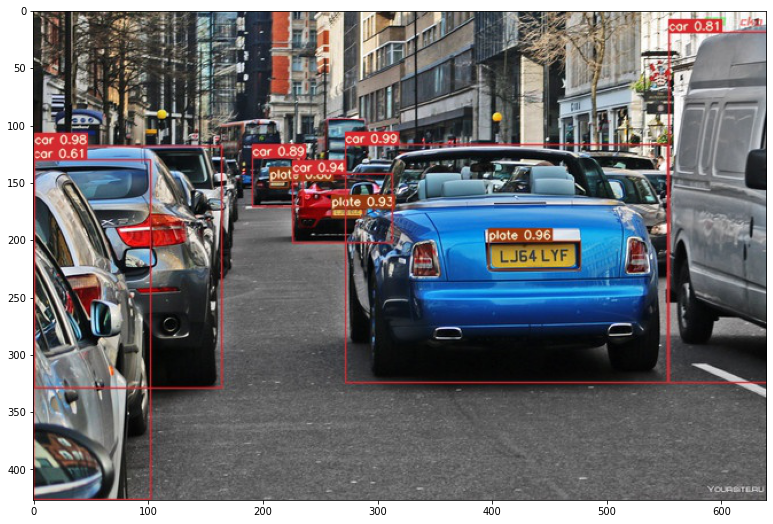

In [20]:
%matplotlib inline
img = Image.open('/content/yolov7/runs/detect/exp/test_img.jpg')
img = np.array(img)
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.show()

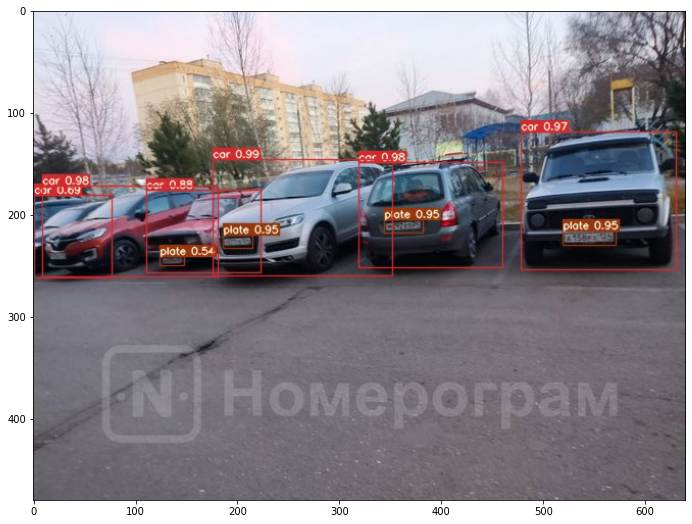

In [21]:
%matplotlib inline
img = Image.open('/content/yolov7/runs/detect/exp/test_img1.jpg')
img = np.array(img)
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.show()

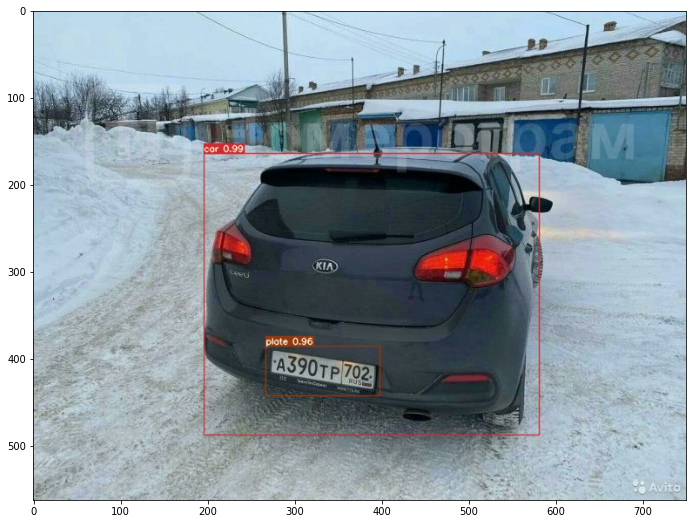

In [22]:
%matplotlib inline
img = Image.open(
    '/content/yolov7/runs/detect/exp/test_img2.jpg'
    )
img = np.array(img)
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.show()

**6. Детектирование изображения с помощью easyocr**

In [ ]:
%cd /content/yolov7

**Подгружаем свой поправленный файл detect_easyocr**

In [ ]:
!gdown 1mILbnmcZHk6wWhFVNk0nOWs8HvoHfeNo

In [ ]:
!python detect_easyocr.py --weights /content/best.pt --conf 0.5 --img-size 640 --source ./data/test_images/test_img.jpg --no-trace --device 0

**7. Проверяем как работает модель с easyocr**

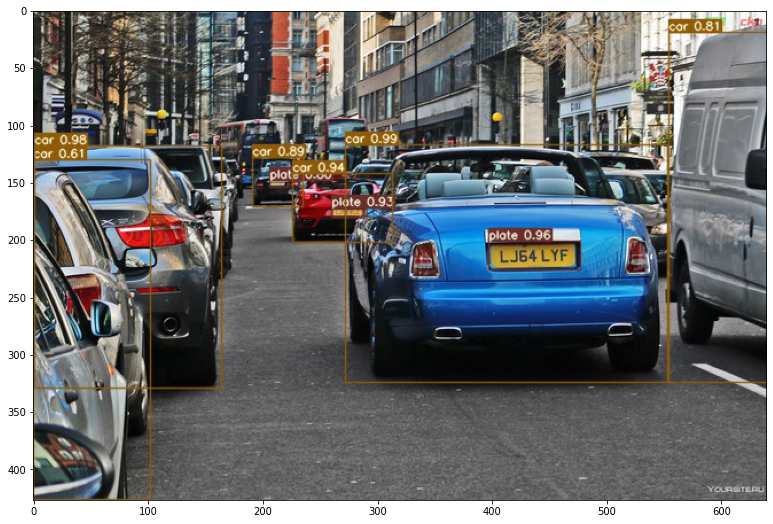

In [27]:
%matplotlib inline 
img = Image.open(
    '/content/yolov7/runs/detect/exp2/test_img.jpg'
    )
img = np.array(img)
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.show()

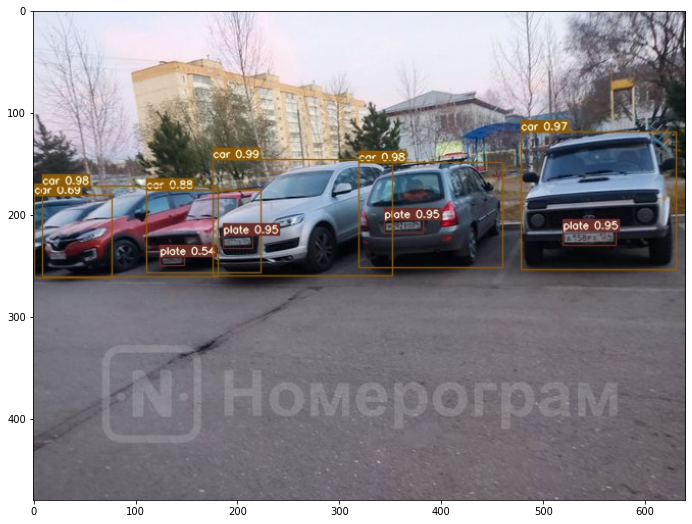

In [28]:
%matplotlib inline 
img = Image.open(
    '/content/yolov7/runs/detect/exp2/test_img1.jpg'
    )
img = np.array(img)
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.show()

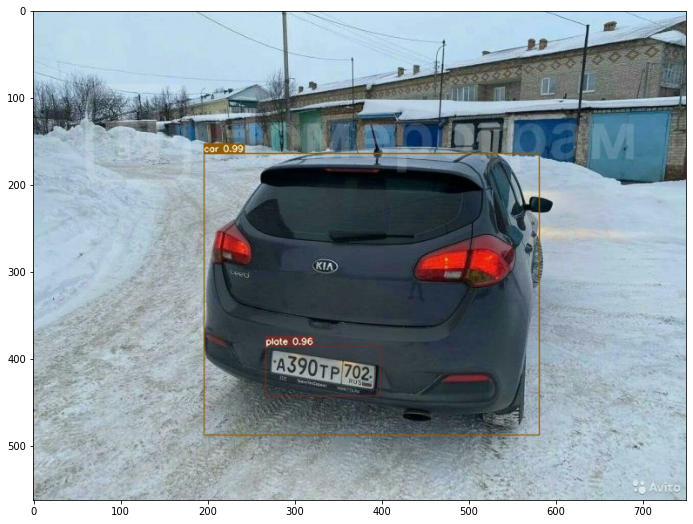

In [29]:
%matplotlib inline 
img = Image.open(
    '/content/yolov7/runs/detect/exp2/test_img2.jpg'
    )
img = np.array(img)
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.show()

**8. Метрики**

In [ ]:
!python test.py --data data/dataset_yolo7.yaml --img 640 --batch 8  --weights /content/best.pt --name yolov7-200t --device 0